# AirBnB Seattle Data Analysis (continued)
For the Udacity Data Scientist Blog Post an analysis of dataset has to be done.
This notebook is used to analyze the data from AirBnB Seattle provided in Kaggle:

* https://www.kaggle.com/datasets/airbnb/seattle


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df_cal = pd.read_csv('./data/calendar.csv')
df_list = pd.read_csv('./data/listings.csv')
df_rev = pd.read_csv('./data/reviews.csv')

# Question 3 - Did customer stop using AirBnB after they gave a bad rating?

To analyze this question we could look for reviews from the same person (reviewer_id) which have a better rating at the beginning and one bad rating at the end.

Unfortunately the relevant information for analyzing this question is not in the data.

In [3]:
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


The data reviews do not contain the rating.
So, this question can not be answered as originally intended.

Another aproach could be to look for the worst rated listings and look, if there are reviewers which had this listing rated as last review.

Sorting the dataframe by rating

In [14]:
df_list_worst = df_list.dropna(subset=["review_scores_rating", "id"]).sort_values("review_scores_rating")[["review_scores_rating", "id"]]
#df_list_worst = df_list.dropna(subset=["review_scores_rating"]).sort_values("review_scores_rating")["review_scores_rating"]
df_list_worst

,review_scores_rating,id
1222,20.0,9183838
3148,40.0,5639238
2320,40.0,8474294
1162,40.0,9151865
1666,40.0,9151374
...,...,...
2014,100.0,7674720
2000,100.0,9908591
1999,100.0,6926511
2029,100.0,4567243


lets take a look at the distribution

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

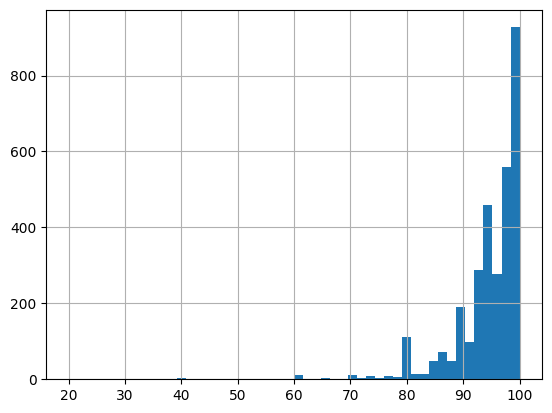

In [17]:
df_list_worst["review_scores_rating"].hist(bins=50)
df_list_worst["review_scores_rating"].describe()

There are only very few bad ratings (<50), so lets fokus on this listings.

In [18]:
df_list_worst[df_list_worst["review_scores_rating"] < 50]

,review_scores_rating,id
1222,20.0,9183838
3148,40.0,5639238
2320,40.0,8474294
1162,40.0,9151865
1666,40.0,9151374


In [21]:
worst_listing_ids = list(df_list_worst[df_list_worst["review_scores_rating"] < 50]["id"])
worst_listing_ids

[9183838, 5639238, 8474294, 9151865, 9151374]

In [48]:
bad_reviews = df_rev[df_rev["listing_id"].isin(worst_listing_ids)]
bad_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
43527,9183838,55880754,2015-12-06,4822953,Svetlana,Unfortunately my experience with the Belltown ...
53315,5639238,30364450,2015-04-20,15207038,Mel,Tim was very responsive and clear in his instr...
53316,5639238,30534500,2015-04-23,11921744,Jennifer & Chris,Tim was a good host and was very responsive to...
72262,9151865,56329934,2015-12-12,21545556,Shinjae,I stayed at Vivian's place since it was locate...
78872,9151374,53543652,2015-11-09,24212341,Mike,"TL;DR - This place has a ton of potential, but..."
78873,9151374,54081493,2015-11-15,27128862,Marlon,The host canceled this reservation the day bef...
78874,9151374,54967522,2015-11-26,15025695,Diane,The host canceled this reservation the day bef...
80851,8474294,51219173,2015-10-18,44631,Bradford,"A beautiful, clean house in a convenient locat..."


This is an overseeable number of reviews (8).
Of course, this is only a guess, that these reviews are really bad, because the average rating of the listing was bad.
So, manually look at the comments:

In [37]:
list(bad_reviews["comments"])

["Unfortunately my experience with the Belltown apartment in Seattle is very very disappointing :(  I hate to complain or write negative reviews, however I have to do it.\r\nThe first, this apartment we booked for 3 guests. There is a king size bed for 2 people and for a third person  a very small, tiny and narrow sofa, that is good enough to have a short nap!!!!  When I called to a property management and told that... The answer was : we can deliver a air bed for 50$ delivery fee ?!?!? Why ?!? We paid for a night 319$ US. \r\nThe second one, there is NO internet ! We again, called to the property managemnet and asked if there is a wireless or wired Internet ! The man on the phone said,he would call to the owner and asked for a WIFI password and log in. Never called  us back :( \r\nThe third, it was very cold in the appartment ! There is no an instruction or a guest info book or so... \r\nWe at our own risk, opened the hitter's vents and eventually it was little bit warmer! \r\nOne mor

Manually cleansing the texts:

* 30534500 is positiv
* 54081493 was created automatically because of cancellation 
* 54967522 was created automatically because of cancellation 



In [52]:
really_bad_reviews = bad_reviews[~bad_reviews["id"].isin([30534500, 54081493, 54967522])]
really_bad_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
43527,9183838,55880754,2015-12-06,4822953,Svetlana,Unfortunately my experience with the Belltown ...
53315,5639238,30364450,2015-04-20,15207038,Mel,Tim was very responsive and clear in his instr...
72262,9151865,56329934,2015-12-12,21545556,Shinjae,I stayed at Vivian's place since it was locate...
78872,9151374,53543652,2015-11-09,24212341,Mike,"TL;DR - This place has a ton of potential, but..."
80851,8474294,51219173,2015-10-18,44631,Bradford,"A beautiful, clean house in a convenient locat..."


In [61]:
neg_reviewerids = list(really_bad_reviews["reviewer_id"])
neg_reviewers_reviews = df_rev[df_rev["reviewer_id"].isin(neg_reviewerids)]
neg_reviewers_reviews.groupby("reviewer_id").count()

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
44631,2,2,2,2,2
4822953,1,1,1,1,1
15207038,2,2,2,2,2
21545556,2,2,2,2,2
24212341,1,1,1,1,1


The reviewers did not really write lots of reviews during this time. Only 3 reviewers wrote 2 reviews, the others wrote only the negative review

In [62]:
df_rev[df_rev["reviewer_id"] == 44631]

,listing_id,id,date,reviewer_id,reviewer_name,comments
24150,319768,9419492,2013-12-28,44631,Bradford,What a COOL place! Jen was kind enough to let ...
80851,8474294,51219173,2015-10-18,44631,Bradford,"A beautiful, clean house in a convenient locat..."


In [63]:
df_rev[df_rev["reviewer_id"] == 15207038]

,listing_id,id,date,reviewer_id,reviewer_name,comments
53315,5639238,30364450,2015-04-20,15207038,Mel,Tim was very responsive and clear in his instr...
55437,2309250,29861113,2015-04-13,15207038,Mel,Michelle and Mark were awesome from the start....


In [64]:
df_rev[df_rev["reviewer_id"] == 21545556]

,listing_id,id,date,reviewer_id,reviewer_name,comments
21971,279063,54493807,2015-11-20,21545556,Shinjae,I had a last minute trip to seattle and calen'...
72262,9151865,56329934,2015-12-12,21545556,Shinjae,I stayed at Vivian's place since it was locate...


# Result

Based on the very small amount of extracted data (due to missing rating field in revisions) it is not possible to answer the question. Two from three reviewers wrote the bad review as last, one as first. So, even in this small data set there is no tendency to see.